In [ ]:
'''
 * Copyright (c) 2004 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

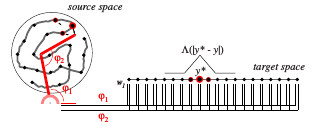

Fig.27: A self-organizing map from the (two-dimensional) disk source space to the (one-dimensional) line of the target space can be learned as follows. For each point x in the target line, there exists a corresponding point in the source space that, if sensed, would lead to x begin most active. For clarity, then, we can link theses points in the source; it is as if the image line is placed in the source space. At the state shown, the particular sensed point leads to x∗ begin most active. The learning rule (Eq. 109) makes its source point move toward the sensed point, as shown by the small arrow. Because of the window function Λ(|y∗ − y|), points adjacent to x∗ are also moved toward the sensed point, thought not as much. If such learning is repeated many times as the arm randomly senses the whole source space, a topologically correct map is learned.

## Self-Organizing Feature Maps (Kohonen Maps)

Self-organizing feature maps (SOFMs), or Kohonen maps, are a type of neural network that learns to represent the structure of input data in a lower-dimensional space while preserving topological relationships. Below is a detailed explanation and implementation of the learning process using the two-layer neural network model discussed.

## Algorithm Explanation

Given:
- Input space $ \phi = (\phi_1, \phi_2) $ (e.g., angles for a robotic arm).
- Target space $ y $ (e.g., points along a line or grid).

### Learning Rule:
1. Compute the **net activation** for each node $ y_k $:
   $$
   \text{net}_k = \sum_i \phi_i w_{ki}
   $$
   where $ w_{ki} $ are the weights for node $ k $.

2. Identify the **winning unit** $ y^* $ with the maximum activation:
   $$
   y^* = \arg\max_k (\text{net}_k)
   $$

3. Update the weights of the winning unit and its neighbors using:
   $$
   w_{ki}(t+1) = w_{ki}(t) + \eta(t) \Lambda(|y - y^*|) \phi_i
   $$
   - $ \eta(t) $: Learning rate (decreases with time).
   - $ \Lambda(|y - y^*|) $: Window function (e.g., Gaussian or step).

4. Normalize the weight vectors:
   $$
   |w| = 1
   $$

5. Repeat the process for multiple iterations until the weights stabilize.

---

## Implementation

### Python Implementation of SOFMs

This implementation demonstrates a 2D input space $ (\phi_1, \phi_2) $ mapped onto a 1D target space.



In [1]:

import random
import math

# Initialize parameters
def initialize_weights(num_nodes, input_dim):
    """Initialize weights randomly."""
    return [[random.uniform(0, 1) for _ in range(input_dim)] for _ in range(num_nodes)]

def normalize_weights(weights):
    """Normalize weight vectors."""
    for i in range(len(weights)):
        norm = math.sqrt(sum(w ** 2 for w in weights[i]))
        weights[i] = [w / norm for w in weights[i]]
    return weights

def compute_activation(input_vector, weights):
    """Compute activation for all nodes."""
    return [sum(input_vector[i] * weights[j][i] for i in range(len(input_vector))) for j in range(len(weights))]

def find_winner(activations):
    """Find the index of the node with the highest activation."""
    return activations.index(max(activations))

def update_weights(weights, input_vector, winner_idx, learning_rate, window_func):
    """Update weights based on the winner node and its neighbors."""
    num_nodes = len(weights)
    for k in range(num_nodes):
        influence = window_func(abs(k - winner_idx))
        for i in range(len(weights[k])):
            weights[k][i] += learning_rate * influence * (input_vector[i] - weights[k][i])
    return normalize_weights(weights)

def gaussian_window(distance, sigma=1.0):
    """Gaussian window function."""
    return math.exp(-distance ** 2 / (2 * sigma ** 2))

# Self-organizing map training
def train_som(input_data, num_nodes, input_dim, learning_rate=0.1, num_iterations=100, sigma=1.0):
    """Train a self-organizing feature map."""
    weights = initialize_weights(num_nodes, input_dim)
    normalize_weights(weights)

    for t in range(num_iterations):
        for input_vector in input_data:
            # Compute activations
            activations = compute_activation(input_vector, weights)
            
            # Find the winner
            winner_idx = find_winner(activations)
            
            # Update weights
            lr = learning_rate * (1 - t / num_iterations)  # Decaying learning rate
            weights = update_weights(weights, input_vector, winner_idx, lr, lambda d: gaussian_window(d, sigma))
    
    return weights

# Example usage
# Input data: Points sampled from a 2D circular region
input_data = [
    [math.cos(theta), math.sin(theta)] for theta in [i * math.pi / 15 for i in range(30)]
]

# Train a SOM with 10 nodes in a 1D target space
num_nodes = 10
input_dim = 2
trained_weights = train_som(input_data, num_nodes, input_dim, num_iterations=200, sigma=2.0)

# Print the trained weights
print("Trained weights:")
for idx, weight in enumerate(trained_weights):
    print(f"Node {idx}: {weight}")



Trained weights:
Node 0: [-0.26393876374822683, -0.9645394387950436]
Node 1: [-0.5130162648741262, -0.8583788860256294]
Node 2: [-0.8201629592167761, -0.5721299855179599]
Node 3: [-0.9977009018479928, -0.06777101483452996]
Node 4: [-0.8877789075803191, 0.460270150298165]
Node 5: [-0.540156589206883, 0.8415645305835949]
Node 6: [-0.029382978528935642, 0.9995682270724535]
Node 7: [0.48832045374114497, 0.872664388214646]
Node 8: [0.8071909370173245, 0.5902904295320174]
Node 9: [0.9384264890365442, 0.3454789786290112]


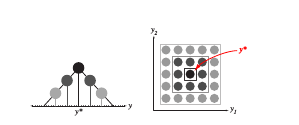

Fig.28: Typical window functions for self-organizing maps for target spaces in one dimension (left) and two dimensions (right). In each case, the weights at the maximally active unit, y∗, in the target space get the largest weight update while units more distant get smaller update.

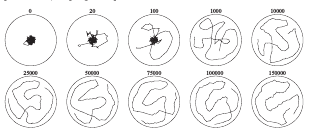

Fig.29: If a large number of pattern presentations are made using the setup of Fig.27, a topologically ordered map develops. The number of pattern presentations is listed.


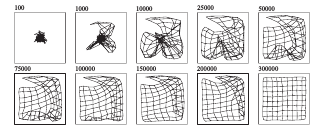

Fig.30: A self-organizing feature map from a square source space to a square (grid) target space. As in Fig.27, each grid point of the target space is shown atop the the point in the source space that leads maximally excites that target point. This example also used the non-linear

# Self-Organizing Feature Maps (Continued)

## Visualization of the Training Process

Self-organizing feature maps (SOFMs) evolve through iterative training, gradually learning to represent the topology of the source space in the target space. Below, we summarize the key points with visual examples and explanations.

---

### Window Functions for Weight Updates

For SOFMs, the **window function** determines how neighboring units in the target space are updated during training.

- **1D Target Space**: The unit \( y^* \) with the maximum activation receives the largest weight update. Nearby units receive smaller updates based on their distance from \( y^* \).
- **2D Target Space**: The same principle applies but extends to 2D, with the influence of \( y^* \) decreasing radially.

#### LaTeX Representation:
\[
w_{ki}(t+1) = w_{ki}(t) + \eta(t) \Lambda(|y - y^*|) \phi_i
\]

---

### Development of the Map

Training progresses as patterns are presented to the network, with the weights gradually adjusting to form a topologically ordered map.

- **Example 1**: Mapping from a circular disk source space to a 1D target space line.
    - Over time, the target line stretches and aligns itself with the topology of the source space (Fig. 10.29).
- **Example 2**: Mapping from a square source space to a 2D grid in the target space (Fig. 10.30).

---

### Challenges and Solutions

1. **Ambiguities in Mapping**:
   - Due to symmetries in the source and target spaces, the learned map might have multiple valid orientations (rotations and flips).
   - For clustering and classification tasks, these ambiguities are generally inconsequential.

2. **Kinks in the Map**:
   - Some regions may learn conflicting orientations, resulting in discontinuities or "kinks" in the map (Fig. 10.31).
   - **Solution**:
     - Re-initialize weights randomly.
     - Use a wider window function.
     - Employ a slower decay rate for the learning parameter \( \eta(t) \).

---

### Density-Based Mapping

Self-organizing maps naturally account for variations in the density of the source space (\( p(x) \)):
- High-probability regions in the source space attract more target space nodes, leading to a denser representation.
- This property is useful for preprocessing tasks like classification, as shown in Fig. 10.32.

---

### Applications of SOFMs

1. **Speech Processing**:
   - Map vowel sounds (e.g., /ee/, /eh/, /oo/) from high-dimensional filter outputs to a 2D target space.
   - Similar sounds are mapped close together, facilitating classification with minimal supervised training.

2. **Clustering and Classification**:
   - Use SOFMs to group data into topologically consistent clusters.
   - Subsequent supervised learning can label these clusters for specific applications.

---

### Python Implementation: Visualization of Mapping Process

Below is an example code snippet to visualize the mapping from a circular disk source space to a 2D target space grid.




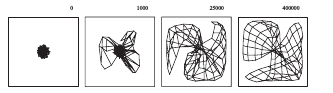

Fig.31: Some initial (random) weights and the particular sequence of patterns (randomly chosen) lead to kinks in the map; even extensive further training does not eliminate the kink. In such cases, learning should be re-started with randomized weights and possibly a wider window function and slower decay in learning.

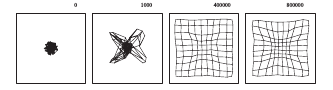

Fig.32: Uneven density: 20 times more likely to choose a point in the center (density is 20 times greater).



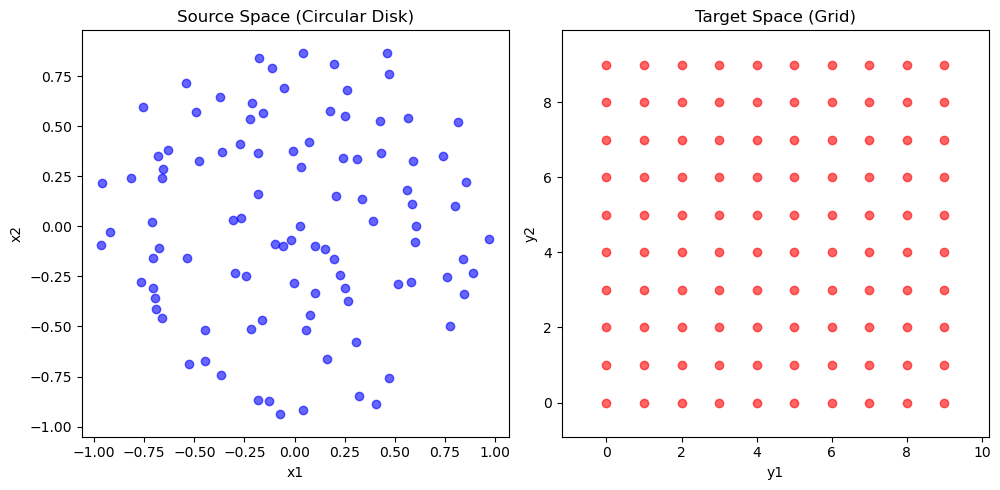

In [3]:

import numpy as np
import matplotlib.pyplot as plt

# Generate source space data (circular disk)
theta = np.linspace(0, 2 * np.pi, 100)
r = np.sqrt(np.random.uniform(0, 1, len(theta)))
x1 = r * np.cos(theta)
x2 = r * np.sin(theta)
source_space = np.array([x1, x2]).T

# Initialize target space (grid)
grid_size = 10
target_space = np.array([
    [i, j] for i in range(grid_size) for j in range(grid_size)
], dtype=float)

# Plot initial setup
plt.figure(figsize=(10, 5))

# Source space
plt.subplot(1, 2, 1)
plt.scatter(x1, x2, color="blue", alpha=0.6)
plt.title("Source Space (Circular Disk)")
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis("equal")

# Target space
plt.subplot(1, 2, 2)
plt.scatter(target_space[:, 0], target_space[:, 1], color="red", alpha=0.6)
plt.title("Target Space (Grid)")
plt.xlabel("y1")
plt.ylabel("y2")
plt.axis("equal")

plt.tight_layout()
plt.show()


## Clustering and Dimensionality Reduction

## Overview

The **curse of dimensionality** poses significant challenges for pattern recognition tasks. To address this, various dimensionality reduction methods have been developed. These methods aim to reduce the number of dimensions while retaining essential information, thereby improving the performance of subsequent tasks like clustering and classification.

---

## Principal Components Analysis (PCA) and Factor Analysis

### Principal Components Analysis (PCA)
- Known in communication theory as the **Karhunen-Loève expansion**.
- Reduces dimensionality by forming **linear combinations** of features.
- Objective: Find a lower-dimensional representation that accounts for the **variance** in the data.

### Factor Analysis
- Reduces dimensionality by finding a lower-dimensional representation that accounts for **correlations** among features.
- Focuses on grouping highly correlated features.

---

## Dimensionality Reduction via Clustering

Dimensionality reduction can also be approached as a clustering problem:
- **Row clustering**: Groups samples (rows of the data matrix).
- **Column clustering**: Groups features (columns of the data matrix), combining highly correlated features.

---

### Hierarchical Dimensionality Reduction Algorithm

#### Key Concept
Use a **correlation matrix** $ R $ to determine the similarity between features:
$$
R = [\rho_{ij}], \quad \rho_{ij} = \frac{\sigma_{ij}}{\sqrt{\sigma_{ii} \sigma_{jj}}}
$$
Where:
- $ \rho_{ij}^2 = 0 $ indicates uncorrelated features.
- $ \rho_{ij}^2 = 1 $ indicates completely correlated features.

#### Algorithm Steps
1. **Initialize**: Start with $ d $ features, each in its own cluster.
2. **Iterate**:
   - Compute the correlation matrix $ R $ using Eq. (110).
   - Identify the two most correlated clusters $ D_i $ and $D_j $.
   - Merge $ D_i $ and $ D_j $ into a single cluster.
   - Update the correlation matrix.
3. **Stop**: Continue until the desired number of clusters is reached.
4. **Return**: The final set of merged clusters.

#### Merging Features
- The simplest approach is to **average** the features in a cluster.
- Features should be scaled to ensure numerical comparability.

---

## Criticism of Dimensionality Reduction Methods

1. **Focus on Representation Over Discrimination**:
   - Methods like PCA and factor analysis emphasize variability or correlation, not class separability.
   - Ideal for representation, but not optimal for **classification** tasks.

2. **Discrimination vs. Representation**:
   - Discriminative features should have a large difference in class means relative to their standard deviations.
   - Methods like **multiple discriminant analysis (MDA)** focus on discrimination.

3. **Theoretical Challenges**:
   - The division between feature extraction and classification is **artificial**.
   - An optimal feature extractor would inherently be an optimal classifier.

---

## Practical Considerations

- Exploiting **domain knowledge** to obtain informative features is often more effective than relying on generic dimensionality reduction techniques.
- For classification tasks, methods that incorporate class-specific information are preferable.

---

### Example: Python Implementation of Hierarchical Dimensionality Reduction

Below is a Python implementation to compute and reduce dimensions using hierarchical clustering based on feature correlations.



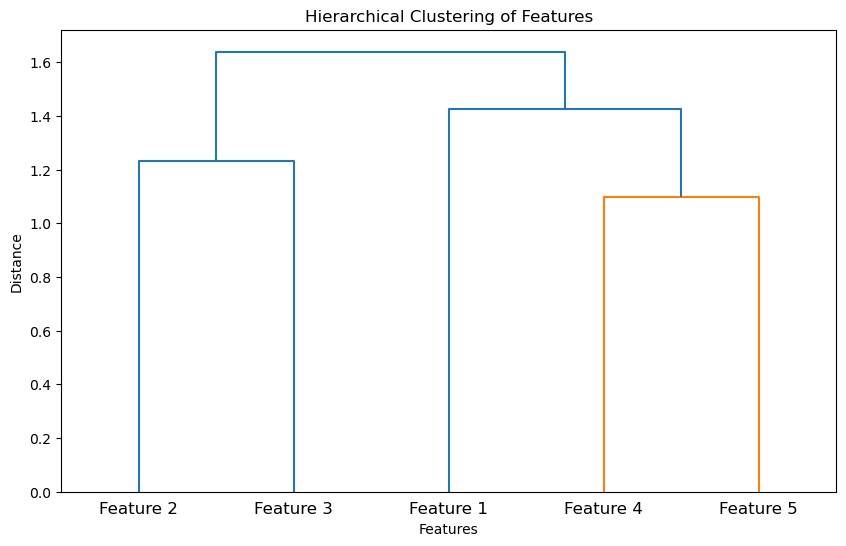

In [4]:

import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Generate a random feature matrix
np.random.seed(42)
n_samples = 100
n_features = 5
data = np.random.rand(n_samples, n_features)

# Compute the correlation matrix
correlation_matrix = np.corrcoef(data, rowvar=False)

# Perform hierarchical clustering using the correlation matrix
linkage_matrix = linkage(correlation_matrix, method='average')

# Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, labels=[f"Feature {i+1}" for i in range(n_features)])
plt.title("Hierarchical Clustering of Features")
plt.xlabel("Features")
plt.ylabel("Distance")
plt.show()


In [5]:
from math import sqrt
from itertools import combinations
from collections import defaultdict

# Generate sample data
import random
random.seed(42)

n_samples = 100
n_features = 5
data = [[random.random() for _ in range(n_features)] for _ in range(n_samples)]

# Function to compute the mean of a list
def mean(values):
    return sum(values) / len(values)

# Function to compute the variance of a list
def variance(values, mean_val):
    return sum((x - mean_val) ** 2 for x in values)

# Function to compute the covariance of two lists
def covariance(values1, values2, mean1, mean2):
    return sum((x1 - mean1) * (x2 - mean2) for x1, x2 in zip(values1, values2))

# Compute the correlation matrix
def compute_correlation_matrix(data):
    n_features = len(data[0])
    correlation_matrix = [[0] * n_features for _ in range(n_features)]
    
    for i in range(n_features):
        for j in range(n_features):
            if i == j:
                correlation_matrix[i][j] = 1  # Perfect correlation with itself
            elif i < j:  # Compute only once for each pair
                feature1 = [row[i] for row in data]
                feature2 = [row[j] for row in data]
                mean1 = mean(feature1)
                mean2 = mean(feature2)
                cov = covariance(feature1, feature2, mean1, mean2)
                var1 = variance(feature1, mean1)
                var2 = variance(feature2, mean2)
                correlation = cov / sqrt(var1 * var2)
                correlation_matrix[i][j] = correlation_matrix[j][i] = correlation
    return correlation_matrix

correlation_matrix = compute_correlation_matrix(data)

# Hierarchical clustering using correlation matrix
def hierarchical_clustering(correlation_matrix):
    n_features = len(correlation_matrix)
    clusters = {i: [i] for i in range(n_features)}  # Each feature starts as its own cluster
    distances = {}  # Store distances for pairs
    
    # Initialize distances
    for i, j in combinations(range(n_features), 2):
        distances[(i, j)] = 1 - correlation_matrix[i][j]  # Use (1 - correlation) as distance
    
    # Perform clustering
    while len(clusters) > 1:
        # Find the pair of clusters with the smallest distance
        (c1, c2), min_dist = min(distances.items(), key=lambda x: x[1])
        
        # Merge clusters
        new_cluster = clusters[c1] + clusters[c2]
        del clusters[c1]
        del clusters[c2]
        new_cluster_id = max(clusters.keys(), default=-1) + 1
        clusters[new_cluster_id] = new_cluster
        
        # Update distances
        new_distances = {}
        for cluster_id in clusters:
            if cluster_id == new_cluster_id:
                continue
            # Compute average distance to the new cluster
            dist = sum(
                distances.get((min(x, cluster_id), max(x, cluster_id)), 0) 
                for x in new_cluster
            ) / len(new_cluster)
            new_distances[(min(new_cluster_id, cluster_id), max(new_cluster_id, cluster_id))] = dist
        
        distances = new_distances
    
    return clusters

clusters = hierarchical_clustering(correlation_matrix)

# Display results
print("Final Clusters:")
for cluster_id, features in clusters.items():
    print(f"Cluster {cluster_id}: Features {features}")


Final Clusters:
Cluster 0: Features [4, 3, 2, 0, 1]


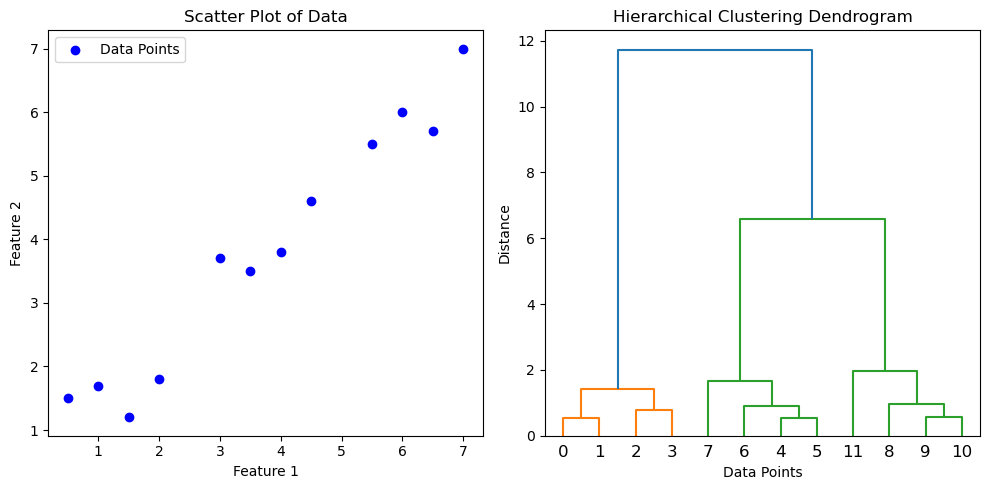

In [6]:
import matplotlib.pyplot as plt

# Generate synthetic data
data = [
    [0.5, 1.5], [1, 1.7], [1.5, 1.2], [2, 1.8],
    [3, 3.7], [3.5, 3.5], [4, 3.8], [4.5, 4.6],
    [5.5, 5.5], [6, 6], [6.5, 5.7], [7, 7]
]

# Calculate correlation matrix
def calculate_correlation(data):
    d = len(data[0])
    r = [[0] * d for _ in range(d)]
    for i in range(d):
        for j in range(d):
            mean_i = sum([x[i] for x in data]) / len(data)
            mean_j = sum([x[j] for x in data]) / len(data)
            numerator = sum([(x[i] - mean_i) * (x[j] - mean_j) for x in data])
            denominator = (
                sum([(x[i] - mean_i) ** 2 for x in data]) ** 0.5 *
                sum([(x[j] - mean_j) ** 2 for x in data]) ** 0.5
            )
            r[i][j] = numerator / denominator if denominator != 0 else 0
    return r

# Hierarchical clustering
def hierarchical_clustering(correlation_matrix):
    clusters = [[i] for i in range(len(correlation_matrix))]
    while len(clusters) > 1:
        max_corr = -float('inf')
        merge_pair = (0, 0)
        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                avg_corr = sum(
                    correlation_matrix[x][y]
                    for x in clusters[i]
                    for y in clusters[j]
                ) / (len(clusters[i]) * len(clusters[j]))
                if avg_corr > max_corr:
                    max_corr = avg_corr
                    merge_pair = (i, j)
        clusters[merge_pair[0]].extend(clusters[merge_pair[1]])
        del clusters[merge_pair[1]]
    return clusters

# Plotting
def plot_data_and_dendrogram(data, correlation_matrix):
    # Scatter plot of data
    x, y = zip(*data)
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.scatter(x, y, c='blue', label='Data Points')
    plt.title('Scatter Plot of Data')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()

    # Dendrogram
    from scipy.cluster.hierarchy import dendrogram, linkage
    linked = linkage(data, method='ward')
    plt.subplot(1, 2, 2)
    dendrogram(linked, labels=range(len(data)))
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('Data Points')
    plt.ylabel('Distance')

    plt.tight_layout()
    plt.show()

# Main execution
correlation_matrix = calculate_correlation(data)
clusters = hierarchical_clustering(correlation_matrix)
plot_data_and_dendrogram(data, correlation_matrix)


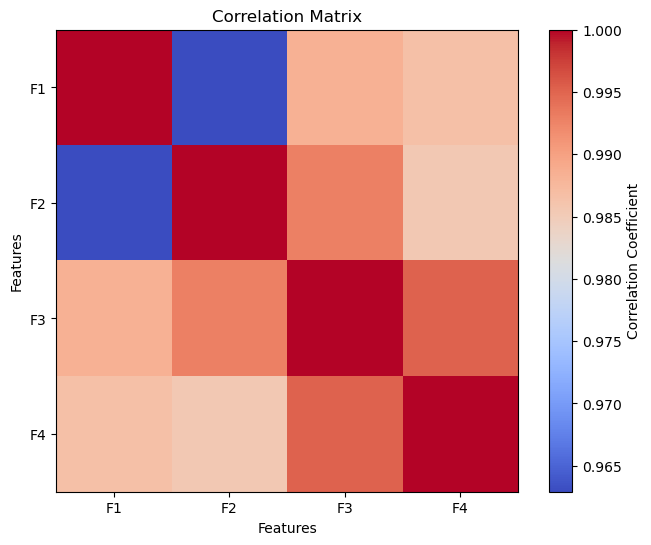

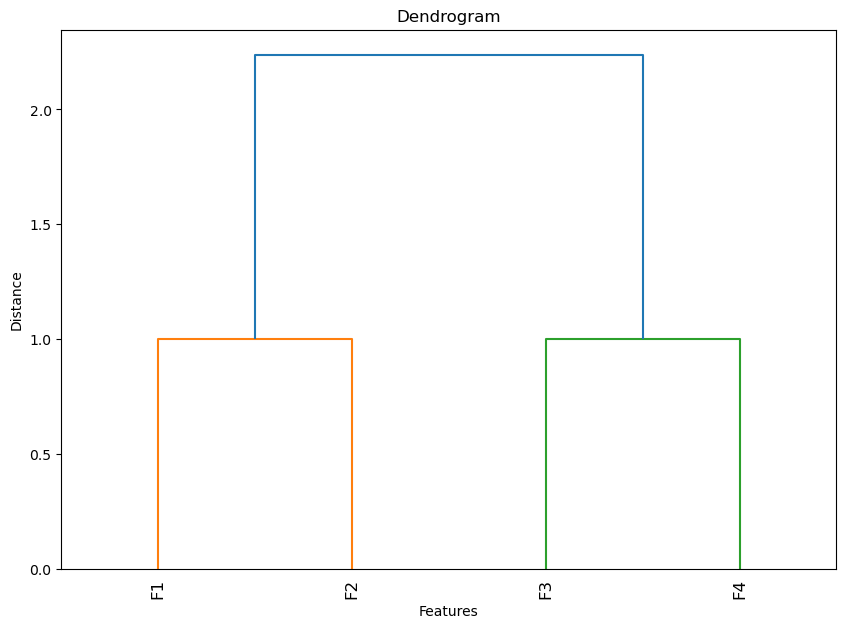

In [7]:
# Dimensionality Reduction by Hierarchical Clustering with Plots
import matplotlib.pyplot as plt

# Sample data matrix: rows are samples, columns are features
data_matrix = [
    [2.5, 3.0, 3.5, 4.0],
    [1.0, 0.5, 1.5, 1.0],
    [3.5, 4.0, 4.5, 5.0],
    [1.0, 1.5, 2.0, 1.5]
]

def compute_correlation_matrix(data):
    """
    Compute the correlation matrix for the given data.
    Each column is treated as a feature.
    """
    num_features = len(data[0])
    correlation_matrix = [[0.0] * num_features for _ in range(num_features)]

    for i in range(num_features):
        for j in range(num_features):
            mean_i = sum(row[i] for row in data) / len(data)
            mean_j = sum(row[j] for row in data) / len(data)

            numerator = sum((row[i] - mean_i) * (row[j] - mean_j) for row in data)
            denominator = (
                sum((row[i] - mean_i) ** 2 for row in data) ** 0.5 *
                sum((row[j] - mean_j) ** 2 for row in data) ** 0.5
            )

            correlation_matrix[i][j] = numerator / denominator if denominator != 0 else 0

    return correlation_matrix

def plot_correlation_matrix(correlation_matrix):
    """Plot the correlation matrix as a heatmap."""
    plt.figure(figsize=(8, 6))
    plt.imshow(correlation_matrix, cmap="coolwarm", interpolation="none")
    plt.colorbar(label="Correlation Coefficient")
    plt.title("Correlation Matrix")
    plt.xlabel("Features")
    plt.ylabel("Features")
    plt.xticks(range(len(correlation_matrix)), [f"F{i+1}" for i in range(len(correlation_matrix))])
    plt.yticks(range(len(correlation_matrix)), [f"F{i+1}" for i in range(len(correlation_matrix))])
    plt.show()

def hierarchical_dimensionality_reduction(data):
    """
    Perform hierarchical dimensionality reduction.
    """
    clusters = [[i] for i in range(len(data[0]))]  # Each feature starts as its own cluster

    while len(clusters) > 1:
        correlation_matrix = compute_correlation_matrix(
            [[row[feature] for feature in cluster] for cluster in clusters for row in data]
        )

        max_corr = -1
        merge_indices = (None, None)

        for i in range(len(correlation_matrix)):
            for j in range(i + 1, len(correlation_matrix)):
                if correlation_matrix[i][j] > max_corr:
                    max_corr = correlation_matrix[i][j]
                    merge_indices = (i, j)

        if merge_indices == (None, None):
            break

        i, j = merge_indices
        clusters[i].extend(clusters[j])
        del clusters[j]

        print(f"Merged clusters {i} and {j}: {clusters}")

    return clusters

def plot_dendrogram(data, labels):
    """Plot a dendrogram for hierarchical clustering."""
    from scipy.cluster.hierarchy import linkage, dendrogram

    transposed_data = list(zip(*data))
    linkage_matrix = linkage(transposed_data, method="ward")

    plt.figure(figsize=(10, 7))
    dendrogram(linkage_matrix, labels=labels, leaf_rotation=90, leaf_font_size=12)
    plt.title("Dendrogram")
    plt.xlabel("Features")
    plt.ylabel("Distance")
    plt.show()

# Compute and plot correlation matrix
correlation_matrix = compute_correlation_matrix(data_matrix)
plot_correlation_matrix(correlation_matrix)

# Perform hierarchical clustering and plot dendrogram
clusters = hierarchical_dimensionality_reduction(data_matrix)
plot_dendrogram(data_matrix, labels=[f"F{i+1}" for i in range(len(data_matrix[0]))])


## Summary

Unsupervised learning and clustering seek to extract information from unlabeled samples. If the underlying distribution comes from a mixture of component densities described by a set of unknown parameters $\theta$, then $\theta$ can be estimated by Bayesian or maximum-likelihood methods. 

A more general approach is to define some measure of similarity between two clusters, as well as a global criterion such as a sum-squared-error or trace of a scatter matrix. Since there are only occasionally analytic methods for computing the clustering that optimizes the criterion, a number of greedy (locally step-wise optimal) iterative algorithms can be used, such as **k-means** and **fuzzy k-means clustering**.

If we seek to reveal structure in the data at many levels—i.e., clusters with sub-clusters and sub-subclusters—then hierarchical methods are needed. **Agglomerative** (bottom-up) methods start with each sample as a singleton cluster and iteratively merge clusters that are "most similar" according to some chosen similarity or distance measure. Conversely, **divisive** (top-down) methods start with a single cluster representing the full dataset and iteratively split into smaller clusters, seeking the subclusters that are most dissimilar. The resulting hierarchical structure is revealed in a **dendrogram**. 

A large disparity in the similarity measure for successive cluster levels in a dendrogram usually indicates the "natural" number of clusters. Alternatively, the problem of cluster validity—knowing the proper number of clusters—can also be addressed by hypothesis testing. In this case, the null hypothesis is that there are $c$ clusters; we then determine if the reduction of the cluster criterion due to an additional cluster is statistically significant.

### Competitive Learning

**Competitive learning** is an online neural network clustering algorithm in which the cluster center most similar to an input pattern is modified to become more like that pattern. To guarantee that learning stops for an arbitrary dataset, the learning rate must decay. Competitive learning can be modified to allow for the creation of new cluster centers, if no center is sufficiently similar to a particular input pattern, as in **leader-follower clustering** and **Adaptive Resonance**.

While these methods have many advantages, such as computational ease and tracking gradual variations in the data, they rarely optimize an easily specified global criterion such as sum-of-squared error.

### Graph Theoretic Methods

**Graph theoretic methods** in clustering treat the data as points to be linked according to a number of heuristics and distance measures. The clusters produced by these methods can exhibit chaining or other intricate structures and rarely optimize an easily specified global cost function. Graph methods are, moreover, generally more sensitive to details of the data.

### Component Analysis

Component analysis seeks to find directions or axes in feature space that provide an improved, lower-dimensional representation for the full data space. In **linear principal component analysis (PCA)**, such directions are the largest eigenvectors of the covariance matrix of the full data; this optimizes a sum-squared-error criterion. 

Nonlinear principal components, for instance, as learned in the internal layer of an **autoencoder neural network**, yield curved surfaces embedded in the full $d$-dimensional feature space onto which an arbitrary pattern $\mathbf{x}$ is projected.

The goal in **independent component analysis (ICA)**—which uses gradient descent in an entropy criterion—is to determine the directions in feature space that are statistically most independent. Such directions may reveal the true sources (assumed independent) and can be used for segmentation and blind source separation.

### Dimensionality Reduction Methods

Two general methods for dimensionality reduction are **self-organizing feature maps (SOMs)** and **multidimensional scaling (MDS)**.

- **Self-organizing feature maps** can be highly nonlinear and represent points close in the source space by points close in the lower-dimensional target space. In preserving neighborhoods in this way, such maps are also called "topologically correct." The source and target spaces can be of very general shapes, and the mapping depends upon the distribution of samples within the source space.
  
- **Multidimensional scaling (MDS)** similarly learns a nonlinear mapping that seeks to preserve neighborhoods. It is often used for data visualization. However, its space complexity limits its usefulness to problems of moderate size.

---

## Bibliographical and Historical Remarks

The literature on unsupervised learning and clustering dates to Karl Pearson, who in 1894 used sample moments to determine the parameters in a mixture of two univariate Gaussians. While most books on pattern classification address unsupervised learning, several modern books [21, 1] and review articles delve into this topic.

Key contributions include:

- The **k-means algorithm**, introduced by Lloyd [28], inspired many variations (e.g., fuzzy k-means [4, 5]) and computational improvements.
- **Principal component analysis (PCA)**, with key mathematical concepts found in [22, 7, 26, 11].
- **Independent component analysis (ICA)**, introduced by Jutten and Herault [23], with a maximum-likelihood approach by Gaeta and Lacoume [15].
- **Multidimensional scaling (MDS)**, discussed in [34, 6], and its relationship to clustering explored in [27].
- **Self-organizing feature maps (SOMs)**, introduced by Kohonen in the early 1980s [24], with a good compendium in [25].

Applications of these methods range from speech recognition to identifying patterns of poverty worldwide.


  ### Om Sree Ganeshayne Maataram Namoh ###
  ### Om Sree Hanumate Namoh ###
  ### Om Sree Bhadraiye Namoh ###
  
  ##### More will be posted soon #####
  #### Vande Maataram ####